# January 2025 Puzzle Solution 


Feeling lucky? A prize wheel features prizes worth 1 USD, 3 USD, and 10 USD. The probability of spinning a 1 USD prize is 0.8, a 3 USD prize is 0.15, and a 10 USD prize is 0.05. With each spin, you can either take the prize you land on or give it up and spin again. You get 8 spins total and can collect only 1 prize.

 
**If you play the game optimally, what’s the expected total value of your prizes?**

Bonus: Now you have 10 spins total but can collect up to 2 prizes. If you play the game optimally, now what’s the expected total value of your prizes? 

[Reference solution on brilliant](https://brilliantorg.notion.site/January-solution-189b4926c48580938beffaae390b0f50)

## Solution 

## The Strategy  

For any attempt:  

1. If 10 USD $\Rightarrow$ take the prize, quit the game.  
2. If 1 USD and remaining attempts $\Rightarrow$ give it up and spin again.  
3. If 1 USD and no attempts $\Rightarrow$ take the prize, game over.  
4. If 3 USD and the remaining attempts are not less than a **threshold** value $\Rightarrow$ give it up and spin again.  
5. If 3 USD and the remaining attempts are less than a threshold value $\Rightarrow$ take the prize, quit the game.  


Let:  

$p = 0.80$ - the probability of spinning a 1 USD prize  
$q = 0.15$ - the probability of spinning a 3 USD prize  
$g = 0.05$ - the probability of spinning a 10 USD prize  
$n = 8$ - attempts  

### Computing the Threshold Value  

The player decides to give the prize up and spin again if the chance to get a larger prize for the **remaining attempts** $t$ is bigger than vice versa. The **threshold** condition is:  

$$
1 - p^t > p^t
$$

Thus, the player gives it up if the remaining attempts $t\geq 4$. Set the **threshold** to exactly $t=4$.  

### Possible Game Outcomes  

The game may be completed with either a 1 USD prize, 3 USD prize, or 10 USD prize:  

 - **1 USD prize**: When the first $n-t$ attempts result in 1 USD or 3 USD, and all the others are exactly 1 USD.  
 - **3 USD prize**: When the first $n-t$ attempts result in 1 USD or 3 ASD, then the player spins exactly 1 USD and gives it up until the first 3 USD.  
 - **10 USD prize**: When the first 10 USD occurs during the first $n-t$ spins, or else all further attempts should be 1 USD until the first 10 USD.  

Put it all together:  



$$
\mathrm{P}\left( X = 1USD \right) = \left( p+q \right)^{n-t}p^{t} = a^{s}p^{t}
$$

Where: 
 - $a = p + q$  - the probability that the player wins 1 USD or 3 USD
 - $s = n-t$ - first attempts before the threshold
 - $X$ - random variable representing the amount of the prize


$$
\mathrm{P}\left( X = 3 USD \right) = a^{s}\left( q+pq+p^{2}q+...+p^{t-1}q \right) = a^{s}q\frac{1-p^{t}}{1-p}
$$


The first 10 USD that occurs during the first $s=n-t$ spins is the opposite of the event of 1 USD or 3 USD (anything that is not 10 USD) during **all** first $s=n-t$ spins: $1 - a^{s}$. Winning 10 USD for the remaining attempts means 1 USD or 3 USD first $s=n-t$ attempts and then the first 10 USD after 1 USD in all prior attempts: 

$$
a^{s}\left( g + gp + gp^{2} + ... + gp^{t-1}\right) = a^{s}g\frac{1-p^{t}}{1-p}
$$


Thus:

$$
\mathrm{P}\left( X = 10 USD \right) = 1 - a^{s}\left( 1-g \frac{1-p^{t}}{1-p} \right) 
$$


Note that 1 USD prize, 3 USD prize and 10 USD prize form a *Complete Set of Events*:

$$
\mathrm{P}\left( X = 1USD \right) + \mathrm{P}\left( X = 3 USD \right) + \mathrm{P}\left( X = 10 USD \right)  = 1
$$

Let's do a sanity check and proof that:


In [6]:
from sympy import symbols, Eq, simplify

p, q, g, n, t = symbols('p q g n t')

a = p + q
g = 1 - a
s = n - t

P_1USD  = (a**s) * (p**t)
P_3USD  = a**s*q*(1 - p**t)/(1 - p)
P_10USD = 1 - a**s*(1 - g*(1 - p**t)/(1 - p))

Eq(simplify(P_1USD + P_3USD + P_10USD), 1)

True

### Expected prize for the basic game

$$
1 \cdot \mathrm{P}\left( X = 1USD \right) + 3 \cdot \mathrm{P}\left( X = 3 USD \right) + 10 \cdot \mathrm{P}\left( X = 10 USD \right)
$$

In [9]:
import brilliant_2025_01 as res

max_attampts = 8
print(f'Expected optimal prize prise in game#1: {res.expected_prize_1(max_attampts):.3f} USD')


Expected optimal prize prise in game#1: 4.473 USD


### General case 

The plot below shows the expected prize as a function of the number of attempts. We can observe that by following the strategy outlined above, the expected prize approaches $10 when the number of attempts is sufficiently large.



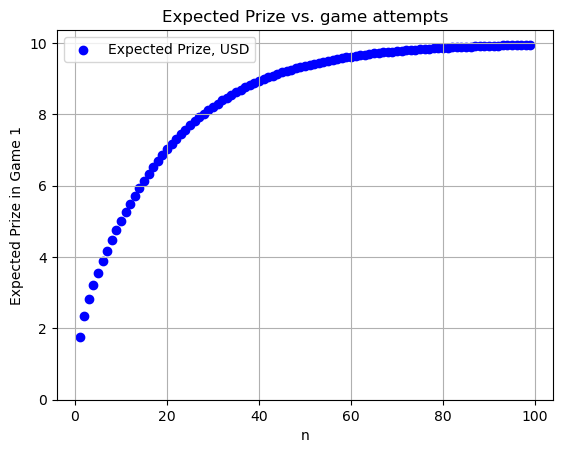

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_expected_prizes_game_1(max_attempts):
    n_values = np.arange(1, max_attempts)
    expected_values = [res.expected_prize_1(n) for n in n_values]

    plt.scatter(n_values, expected_values, color='blue', label='Expected Prize, USD')
    plt.xlabel('n')
    plt.ylabel('Expected Prize in Game 1')
    plt.ylim(0)
    plt.title('Expected Prize vs. game attempts')
    plt.legend()
    plt.grid()
    plt.show()


plot_expected_prizes_game_1(max_attempts=100)